In [ ]:
# ..... homogenize labels ..... #

In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(clusterProfiler)
library(org.Hs.eg.db)

In [3]:
# load data
sc1 = readRDS('lizard_integrated_ssSTACAS.rds')
DefaultAssay(sc1) <- 'RNA'
sc1@meta.data[1,]

orig.ident nCount_RNA nFeature_RNA species
stage9_sample1_AAACCCAAGACCATGG-1 stage9     3853       1832         lizard 
                                  dataset        consensus_type
stage9_sample1_AAACCCAAGACCATGG-1 stage9_sample1 NA            
                                  integrated_snn_res.1 seurat_clusters
stage9_sample1_AAACCCAAGACCATGG-1 9                    9

In [4]:
levels(sc1$seurat_clusters)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29"
[31] "30" "31" "32" "33" "34"

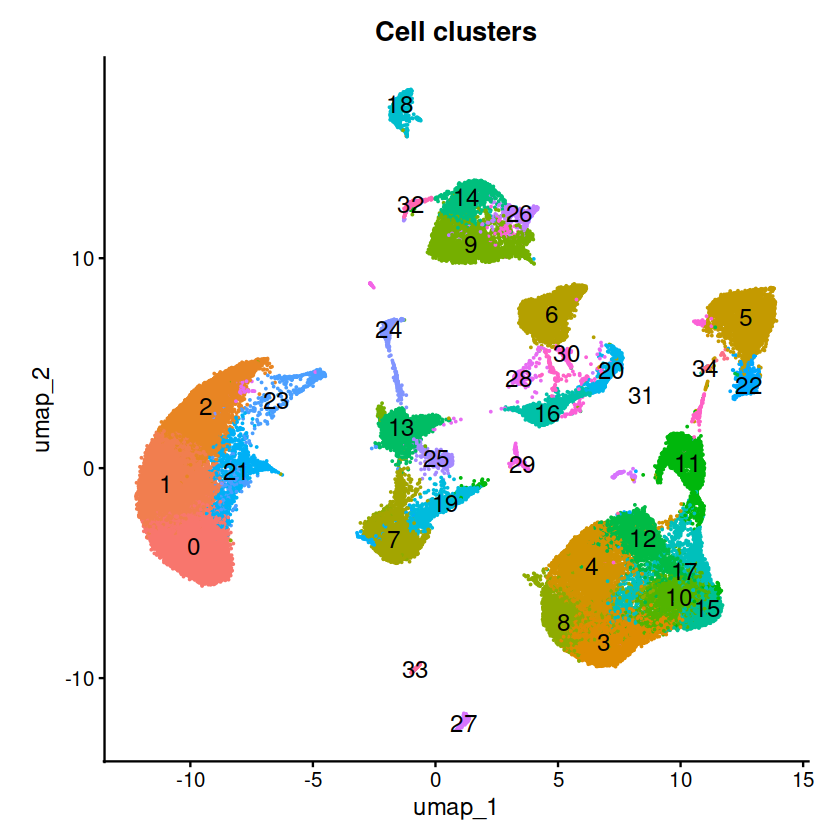

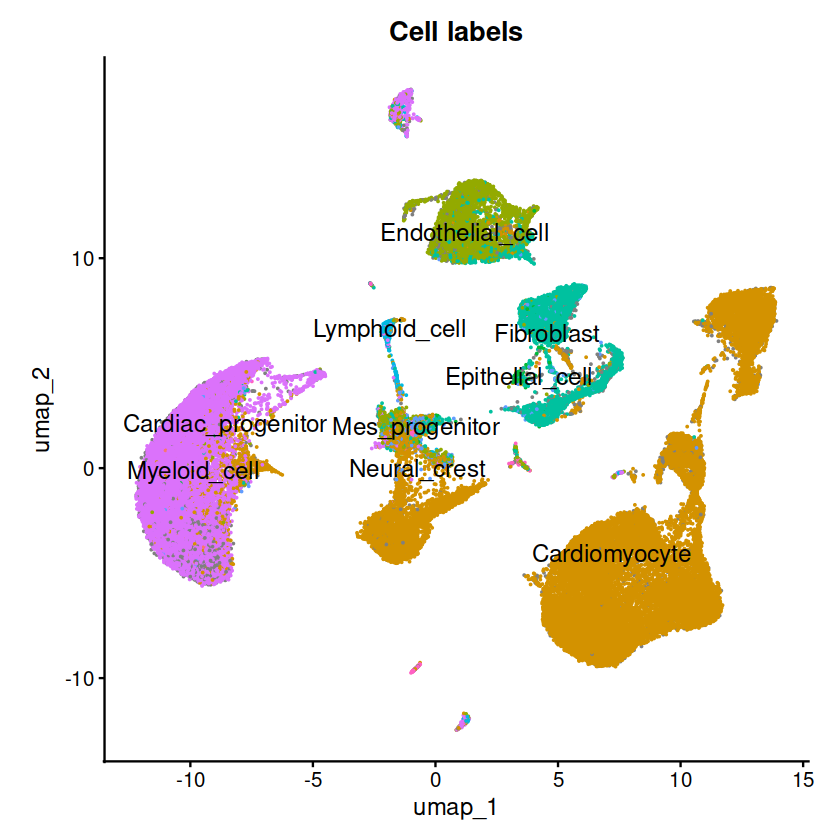

In [5]:
DimPlot(sc1, group.by = 'seurat_clusters', label=T, label.size = 5) + NoLegend() + 
theme(aspect.ratio = 1) + ggtitle("Cell clusters")
DimPlot(sc1, group.by = 'consensus_type', label=T, label.size = 5) + NoLegend() +
theme(aspect.ratio = 1) + ggtitle("Cell labels")

In [4]:
# get markers for each cluster
markers1 <- FindAllMarkers(sc1, only.pos = TRUE)
head(markers1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34



p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene        
ALAS2        0     2.0105386  0.972 0.286 0         0       ALAS2       
LOC132774957 0     0.7523716  0.984 0.328 0         0       LOC132774957
HEMGN        0     1.9842380  0.863 0.211 0         0       HEMGN       
CD24         0     1.5996056  0.835 0.235 0         0       CD24        
LOC132783250 0     1.9695001  0.748 0.199 0         0       LOC132783250
FTH1         0     2.0969262  0.990 0.445 0         0       FTH1

In [8]:
table(markers1$cluster)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 427  791 3173 7271 6751 5637 6719 3439 1267 7097 2495 8483 7092 3657 6524 8011 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
7410 7937 3324 2510 7139  925 5812 1666 2207 2165 5448 1539 3606 3671 9331 6382 
  32   33   34 
6046 4646 3529 

In [8]:
# load list of orthologs
om = read.delim('lizard_mouse_orthologs_eggNOG.txt', sep = '\t')
om <- om[!is.na(om$lizard_gene) & !is.na(om$ortholog_name),]
dim(om)
om[1,]

ven = read.delim('~/septation/additional_data/DE_genes_RVvsLV.txt', sep = ',')
dim(ven)
ven[1:3,]

[1] 27248     7

query          orth_type species             orthologs          lizard_gene
1 XP_060608688.1 one2one   Mus musculus(10090) ENSMUSP00000081225 ARHGEF10   
  ortholog_gene      ortholog_name
1 ENSMUSG00000071176 Arhgef10

[1] 41  7

Gene               logFC     logCPM   PValue       FDR          upreg_in_RV
1 ENSMUSG00000020427 2.2003493 7.403434 6.622454e-30 1.387404e-26 1          
2 ENSMUSG00000003477 1.3868295 7.032664 7.866222e-14 8.239867e-11 1          
3 ENSMUSG00000033965 0.7028235 7.609180 3.006863e-10 1.574844e-07 1          
  Symbol 
1 IGFBP3 
2 INMT   
3 SLC16A2

In [9]:
rv = ven$Gene[ven$upreg_in_RV==1]
rv <- om$lizard_gene[match(rv, om$ortholog_gene)]
rv <- rv[!is.na(rv)]

lv = ven$Gene[ven$upreg_in_RV!=1]
lv <- om$lizard_gene[match(lv, om$ortholog_gene)]
lv <- lv[!is.na(lv)]

In [18]:
# rv vs lv markers?
list1 = markers1$gene[markers1$cluster=='15']
match(rv, list1[1:200])
match(lv, list1[1:200])

[1]  NA  NA  NA  NA  NA  NA 179  NA  NA  NA  NA  NA  NA  NA

[1]  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA 124  NA  NA  NA  NA
[20]  NA  NA

In [5]:
# load list of orthologs
om = read.delim('lizard_human_orthologs_eggNOG.txt', sep = '\t')
om <- om[!is.na(om$lizard_gene) & !is.na(om$ortholog_name),]
dim(om)
om[1,]

ginfo = read.delim('/data/CoCoCoNet/geneInfo/human_info.csv', sep = ',')

[1] 27011     7

query          orth_type species            orthologs       lizard_gene
1 XP_060608688.1 one2one   Homo sapiens(9606) ENSP00000340297 ARHGEF10   
  ortholog_gene   ortholog_name
1 ENSG00000104728 ARHGEF10

In [9]:
ginfo[1,]

EntrezID  EnsemblID       GeneSymbol LocusTag Synonyms
1 100287102 ENSG00000223972 DDX11L1    NA       NA      
  dbXrefs                                   Chromosome Type   UniProtID
1 |HGNC:HGNC:37102|Ensembl:ENSG00000223972| 1          pseudo NA       
  UniProtID2 OrthoID NetworkIDs     
1 NA         NA      ENSG00000223972

In [19]:
list1 = markers1$gene[markers1$cluster=='12']
list2 = ginfo$EntrezID[match(om$ortholog_gene[match(list1, om$lizard_gene)], ginfo$NetworkIDs)]
list2 <-list2[!is.na(list2)]

In [22]:
ggo <- groupGO(gene     = as.character(list2[1:100]),
               OrgDb    = org.Hs.eg.db,
               ont      = "MF",
               level    = 3,
               readable = TRUE)

head(ggo)

ID         Description                               Count GeneRatio
GO:0000146 GO:0000146 microfilament motor activity              2     2/100    
GO:0003777 GO:0003777 microtubule motor activity                0     0/100    
GO:0061791 GO:0061791 GTPase motor activity                     0     0/100    
GO:0140605 GO:0140605 proton motive force-driven motor activity 0     0/100    
GO:0004133 GO:0004133 glycogen debranching enzyme activity      1     1/100    
GO:0009975 GO:0009975 cyclase activity                          0     0/100    
           geneID     
GO:0000146 MYH7B/MYH10
GO:0003777            
GO:0061791            
GO:0140605            
GO:0004133 AGL        
GO:0009975

In [53]:
list1 = markers1$gene[markers1$cluster=='28']
list1[1:100]

[1] "PCDH7"        "TBX18"        "WT1"          "PCOLCE"       "ADGRG2"      
  [6] "GALNT16"      "CNTNAP5"      "GAS6"         "SMOC2"        "ALDH1A2"     
 [11] "FGF18"        "LOC132777995" "CNTN1"        "CFTR"         "C7"          
 [16] "KRT8"         "SOSTDC1"      "BNC1"         "LOC132760774" "ABCA4"       
 [21] "LOC132778240" "LRRN4"        "LOC132768390" "TTLL10"       "LOC132771837"
 [26] "LOC132774187" "KRT18"        "TGFB3"        "BNC2"         "CDON"        
 [31] "SV2C"         "HPX"          "SAMD10"       "RDH10"        "PARD6B"      
 [36] "GRIA1"        "EPCAM"        "SBSPON"       "LOC132774515" "TLL1"        
 [41] "ARHGAP29"     "AHNAK2"       "FJX1"         "GLIS3"        "SLIT2"       
 [46] "BICC1"        "DNAH1"        "EFNA5"        "SH3RF2"       "GDF6"        
 [51] "F3"           "PRKD1"        "WNT5A"        "GSG1L2"       "SLIT3"       
 [56] "LOC132777994" "RBM47"        "LOC132762789" "RASSF9"       "SULF1"       
 [61] "CLDN11"       "FGF9"         "POU2AF3"      "NCKAP5"       "ZBTB7C"      
 [66] "EGFR"         "CDH4"         "SLC1A2"       "IGSF5"        "CDH11"       
 [71] "CPE"          "TENM3"        "CPXM2"        "MYRF"         "LOC132769167"
 [76] "FRMD4B"       "TNR"          "FERMT1"       "GULP1"        "SAMD11"      
 [81] "PCDH9"        "CFI"          "CA10"         "FRMD1"        "LOC132761000"
 [86] "TGFB2"        "NOD1"         "SEMA3B"       "AGRN"         "LOC132772285"
 [91] "TEK"          "PKP1"         "EPB41L5"      "NRXN1"        "PLXNB2"      
 [96] "EPHA1"        "PPP1R9A"      "LOC132782423" "KNDC1"        "ECRG4"

In [54]:
table(sc1$consensus_type[sc1$seurat_clusters=='31'])


  Cardiomyocyte Epithelial_cell      Fibroblast  Mes_progenitor    Neural_crest 
             88               1              64              27               1 

Warning message:
“The following requested variables were not found: NPPA”


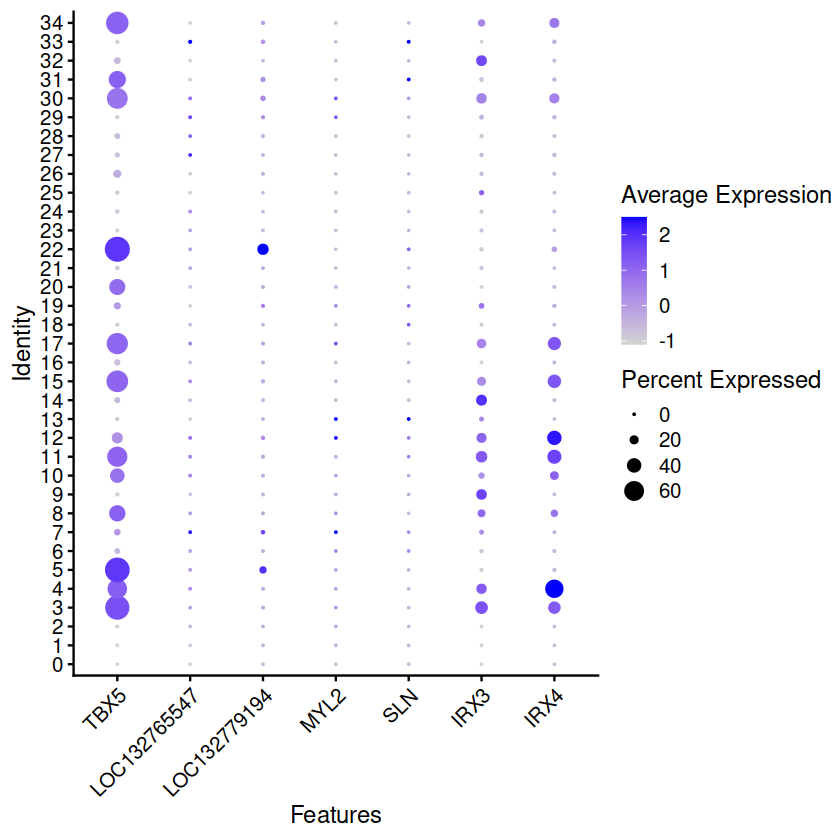

In [24]:
# marker exp - CMs, LOC132765547 <=> MYH7, other is MYH6
DotPlot(sc1, features = c('TBX5', 'LOC132765547', 'LOC132779194', 'MYL2', 'SLN', 'NPPA', 'IRX3', 'IRX4'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: TTN”


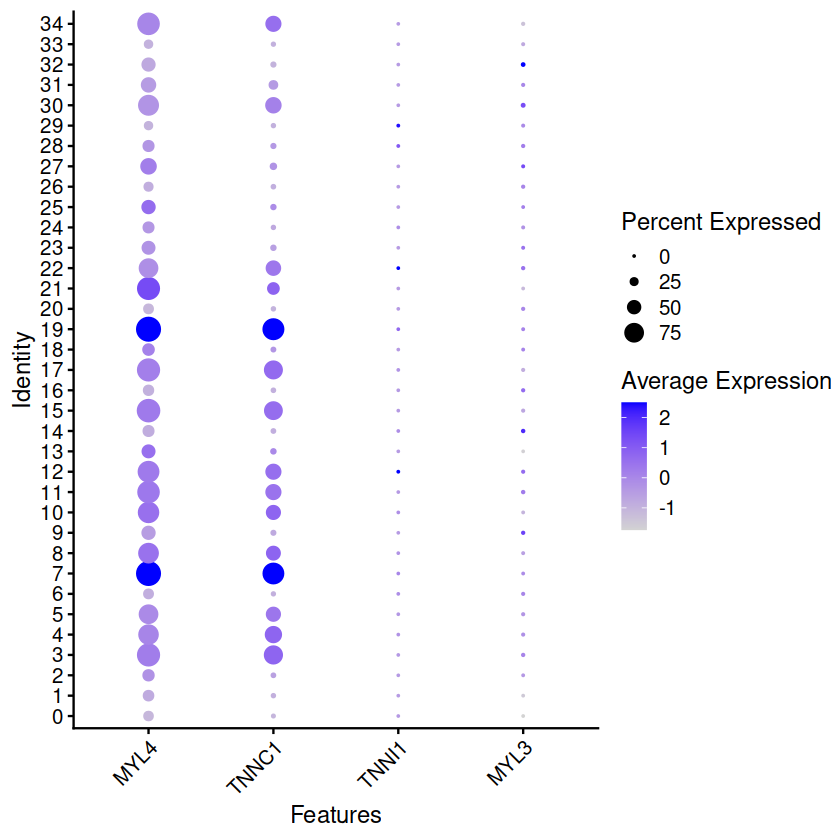

In [25]:
# immature CMs
DotPlot(sc1, features = c('MYL4', 'TNNC1', 'TNNI1', 'MYL3', 'TTN'), group.by = "seurat_clusters") + RotatedAxis()

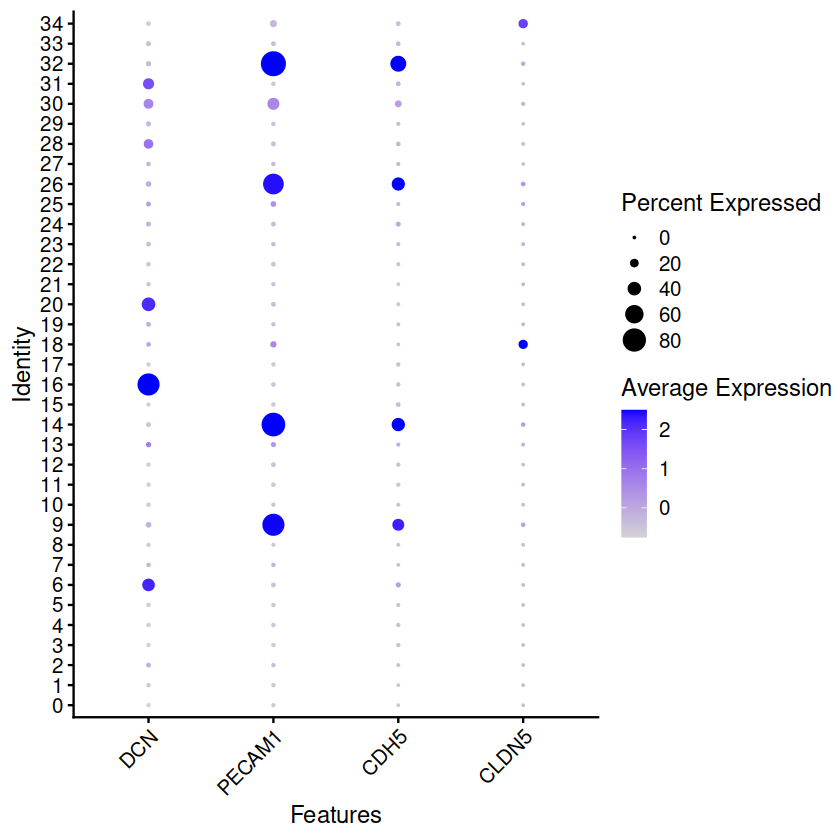

In [26]:
# fibro, endo
DotPlot(sc1, features = c('DCN', 'PECAM1', 'CDH5', 'CLDN5'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: FABP4”


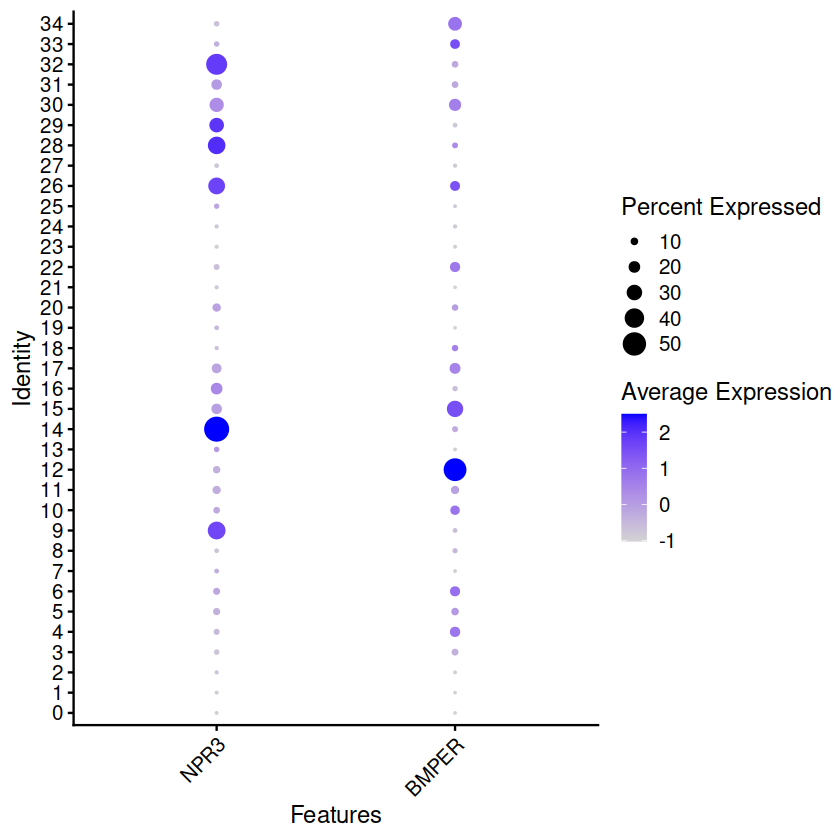

In [27]:
# vascular endothelial vs endocardial
DotPlot(sc1, features = c('FABP4', 'NPR3', 'BMPER'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: MYH11”


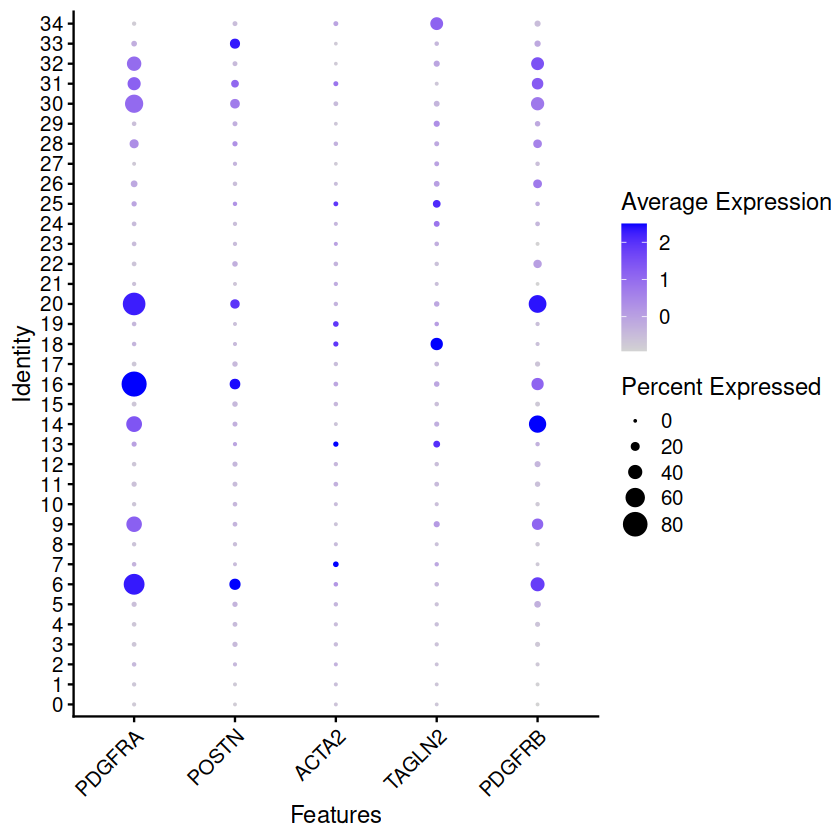

In [5]:
# mural, smc, pericyte
DotPlot(sc1, features = c('PDGFRA', 'POSTN', 'MYH11', 'ACTA2', 'TAGLN2', 'PDGFRB'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: KRT19”


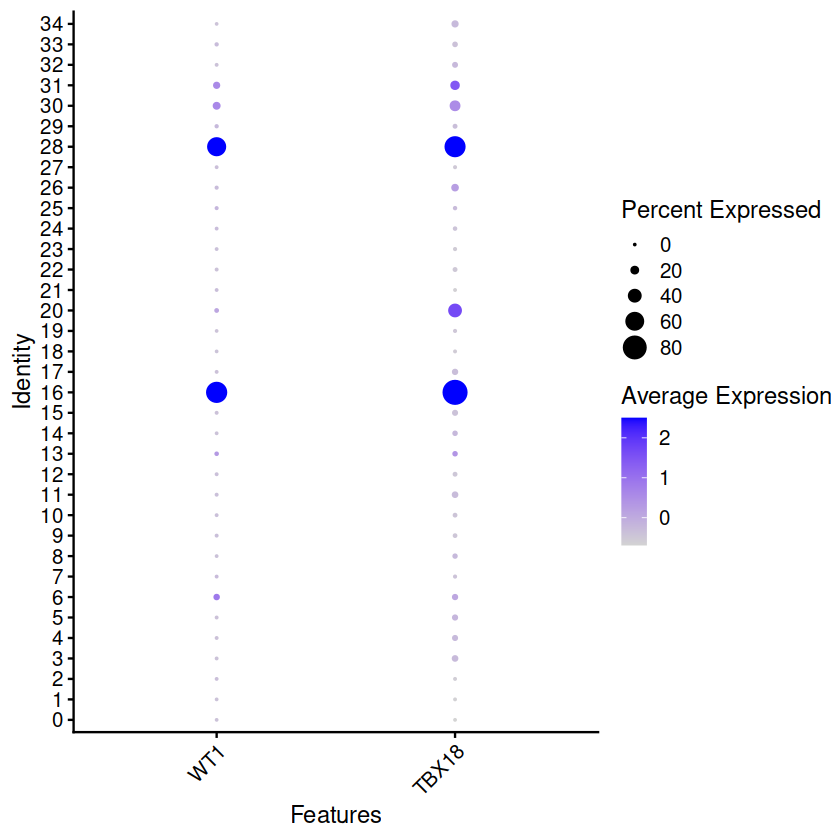

In [6]:
# epicardial
DotPlot(sc1, features = c('KRT19', 'WT1', 'TBX18'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: CD41, HBA-A1, CD71”


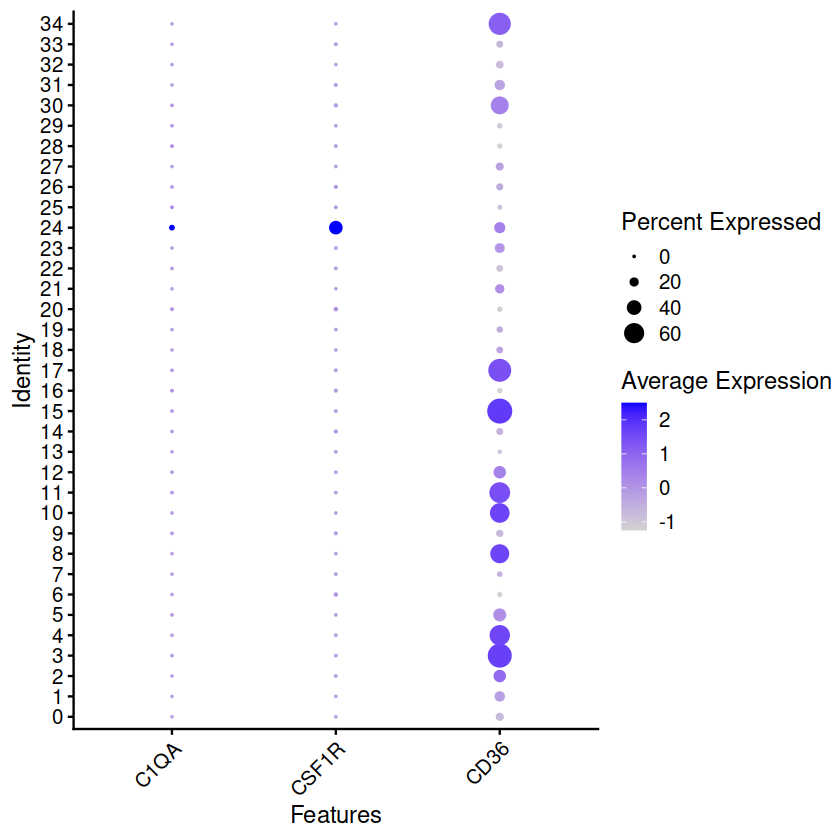

In [7]:
# blood, immune
DotPlot(sc1, features = c('C1QA', 'CSF1R', 'CD41', 'HBA-A1', 'CD36', 'CD71'), group.by = "seurat_clusters") + RotatedAxis()

In [ ]:
# ..... plot marker exp ..... #

In [55]:
# load integrated data
library(viridis)
sc1 = readRDS('lizard_integrated_ssSTACAS.rds')
dim(sc1)
sc1@meta.data[1,]

[1]  3000 80893

orig.ident nCount_RNA nFeature_RNA
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 stage9     3727       1822        
                                            species dataset       
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 lizard  stage9_sample1
                                            consensus_type  
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 Endothelial_cell
                                            integrated_snn_res.1
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 14                  
                                            seurat_clusters
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 14

In [58]:
# get harmonised labels
tab1 = read.delim('lizard_ssSTACAS_celltypes.txt', sep = '\t')
tab1[1,]

sc1$stage = sc1$orig.ident
sc1$broad_type = tab1$subtype[match(sc1$seurat_clusters, tab1$cluster)]
sc1$cluster = tab1$label[match(sc1$seurat_clusters, tab1$cluster)]
sc1$ctypes <- sub('\\_.*', '', sc1$cluster)
sc1@meta.data[1,]

species cluster celltype subtype label cluster_new
1 lizard  7       CM       aCM     aCM_1 c1

orig.ident nCount_RNA nFeature_RNA
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 stage9     3727       1822        
                                            species dataset       
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 lizard  stage9_sample1
                                            consensus_type  
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 Endothelial_cell
                                            integrated_snn_res.1
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 14                  
                                            seurat_clusters stage  broad_type 
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 14              stage9 endocardial
                                            cluster       ctypes     
stage9_sample1_9_sample1_AAACCCAAGACCATGG-1 endocardial_2 endocardial

In [79]:
# cell type order
ctype_order = c('vCM', 'aCM', 'immature-CM', 'endothelial', 'endocardial', 'epicardial',
                'fibroblast', 'SMC', 'pericyte', 'neural-crest', 'blood', 'macrophage')

DefaultAssay(sc1) <- 'RNA'
sc1$ctypes = factor(sc1$ctypes, levels = rev(ctype_order))
Idents(sc1) <- 'ctypes'

In [92]:
gene_list = c('TBX5', 'ACTN2', 'MYL2', 'IRX4', 'MYL4', 'TNNC1', 
              'PECAM1', 'CDH5', 'NPR3', 'WT1', 'TBX18',
              'DCN', 'POSTN', 'PDGFRA', 'ACTA2', 'PDGFRB',               
              'NRXN1', 'SLC4A1', 'CD24', 'CSF1R')
# DotPlot(sc1, features = gene_list, group.by = "ctypes") #+ coord_flip()

In [93]:
# png('aa-lizard-marker-exp-dotplot.png', width = 11, height = 5, res = 300, units = 'in')
DotPlot(sc1, features = gene_list) +
  geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.1) +
  scale_colour_viridis(option="inferno") +
  guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white"))) +
theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1)) 
# dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2